<a href="https://colab.research.google.com/github/Khai-Sing-Wu/Face-mask-classifier/blob/main/Face_mask_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/gdrive')

DATADIR ='gdrive/MyDrive/dataset'
CATEGORIES = ["with_mask", "without_mask"]



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


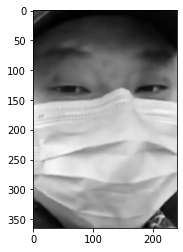

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break

In [ ]:
print(img_array.shape)

(365, 241)


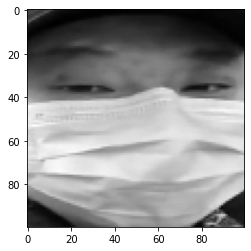

In [ ]:
IMG_SIZE = 100
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [ ]:
data=[]
label =[]
def create_train_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      data.append(new_array)
      label.append(class_num)
create_train_data()


In [ ]:
print(len(data))

3833


In [ ]:
lb = LabelBinarizer()
label = lb.fit_transform(label)
label = to_categorical(label)

In [ ]:
data=np.array(data).reshape(-1,IMG_SIZE,IMG_SIZE,1)
label=np.array(label)

In [ ]:
data = data/255.0
model =Sequential()
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
output =model.fit(data,label,batch_size=32, epochs =20)

Epoch 1/20
120/120 [==============================] - 293s 2s/step - loss: 0.5741 - accuracy: 0.7141
Epoch 2/20
120/120 [==============================] - 287s 2s/step - loss: 0.3877 - accuracy: 0.8317
Epoch 3/20
120/120 [==============================] - 287s 2s/step - loss: 0.3309 - accuracy: 0.8622
Epoch 4/20
120/120 [==============================] - 290s 2s/step - loss: 0.2603 - accuracy: 0.8954
Epoch 5/20
120/120 [==============================] - 290s 2s/step - loss: 0.2422 - accuracy: 0.8975
Epoch 6/20
120/120 [==============================] - 288s 2s/step - loss: 0.1999 - accuracy: 0.9183
Epoch 7/20
120/120 [==============================] - 287s 2s/step - loss: 0.1801 - accuracy: 0.9306
Epoch 8/20
120/120 [==============================] - 287s 2s/step - loss: 0.1488 - accuracy: 0.9400
Epoch 9/20
120/120 [==============================] - 288s 2s/step - loss: 0.1654 - accuracy: 0.9343
Epoch 10/20
120/120 [==============================] - 288s 2s/step - loss: 0.1508 - accura

In [ ]:
result=output.history

In [ ]:
epochs = np.arange(0,20)

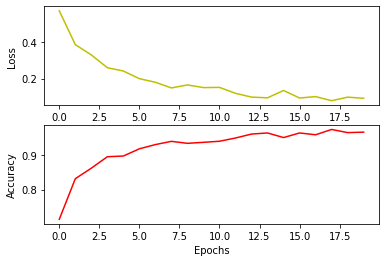

In [ ]:
plt.figure(1)
plt.subplot(211)
plt.plot(epochs,result['loss'],c='y')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(212)
plt.plot(epochs,result['accuracy'],c='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
(X_train, X_test, y_train, y_test)=train_test_split(data, label,test_size=0.20, stratify=label, random_state=10)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

24/24 [==============================] - 16s 672ms/step - loss: 0.0303 - accuracy: 0.9935
